In [123]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=


In [124]:
import sys

sys.path.append("../")

In [125]:
import fof.dataloader
import transformers as tr
from pathlib import Path
import torchvision
import torch

In [126]:
loader = fof.dataloader.ScicapDataModule(
  "First-Sentence",
  tokenizer=tr.AutoTokenizer.from_pretrained("distilbert-base-uncased"),
  root=Path("../scicap_data"),
  batch_size=10,
  caption_type="orig",
  num_workers=0, transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
  ]))
test = loader.test_dataloader()

Initializing SCICAP training dataset
Initializing SCICAP testing dataset
Initializing SCICAP validation dataset
Time taken: 0.053452253341674805


In [133]:
test_iterable = iter(test)
next(test_iterable)
next(test_iterable)
next(test_iterable)
batch = next(test_iterable)
len(batch["figure"])

10

In [128]:
from fof.encdec import EncoderDecoderModel
from fof.dataloader import ScicapDataModule
from pathlib import Path
import wandb
run = wandb.init(project="figuring-out-figures")


In [129]:
def load_model(artifact_str: str = None, ckpt_path: str = None, **kwargs):
    if artifact_str is not None:
        artifact = run.use_artifact(artifact_str, type="model")
        artifact_dir = artifact.download()
        ckpt_path = Path(artifact_dir) / "model.ckpt"
    model = EncoderDecoderModel.load_from_checkpoint(ckpt_path, **kwargs)
    return model


# CLIP + SCIBERT --> DistilGPT2 on original captions
model = load_model(
    "figuring-out-figures/figuring-out-figures/model-27py12gz:v1")

# CLIP + SCIBERT --> DistilGPT2 on normalized captions
# model = load_model('figuring-out-figures/figuring-out-figures/model-1d7mntmw:v2', use_top_p_sampling=True)

# SCIBERT + GPT2 on original captions
# model = load_model(ckpt_path='/data/kevin/arxiv/evaluation_checkpoints/text-features-only.ckpt')


wandb: Downloading large artifact model-27py12gz:v1, 2532.30MB. 1 files... Done. 0:0:0
Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.6.mlp.fc2.weight', 'text_model.encoder.layers.1.layer_norm2.weight', 'text_model.encoder.layers.7.mlp.fc2.weight', 'text_model.encoder.layers.2.layer_norm1.weight', 'text_model.encoder.layers.2.self_attn.out_proj.bias', 'text_model.encoder.layers.4.self_attn.q_proj.bias', 'text_model.encoder.layers.0.self_attn.out_proj.weight', 'text_model.encoder.layers.9.self_attn.k_proj.bias', 'text_model.encoder.layers.11.self_attn.q_proj.weight', 'text_model.encoder.layers.7.mlp.fc1.weight', 'text_model.encoder.layers.0.mlp.fc2.weight', 'text_model.encoder.layers.10.self_attn.q_proj.bias', 'text_model.encoder.layers.3.mlp.fc2.bias', 'text_model.encoder.layers.3.self_attn.q_proj.weight', 'text_model.encoder.layers.2.self_attn.v_proj.bias', 'text_model.encoder.layers.2.s

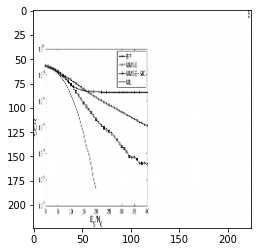

Figure #1
Figure ID: 1001.5364v1-Figure2-1.png
Gold Caption: Fig. 2. Decoding results for8× 8 BPSK real valued system,A = {−1, 1}.
Model's Caption: Fig. 2. MIMO systems with 8-QAM and 12-QAM constellation



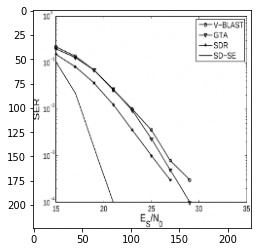

Figure #2
Figure ID: 1001.5364v1-Figure5-1.png
Gold Caption: Fig. 5. Comparison of various detectors in12× 12 system, 16-QAM symbols.
Model's Caption: Fig. 5. MIMO detection performance for 16-QAM, 16-QAM



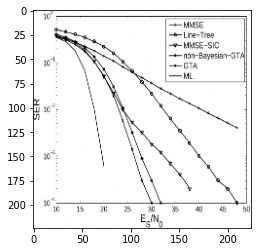

Figure #3
Figure ID: 1001.5364v1-Figure8-1.png
Gold Caption: Fig. 8. Comparative results of MMSE, MMSE-SIC and variants of the GTA for 20× 20 real system,A = {±1,±3}.
Model's Caption: Fig. 8. SER versus SNR comparison of two heuristic variants of GC and exhaustive search



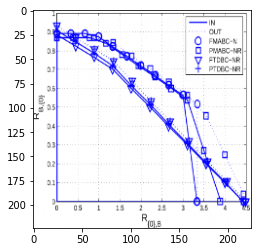

Figure #4
Figure ID: 1002.0123v1-Figure9-1.png
Gold Caption: Fig. 9. Comparison withP0 = Pr = 20, P1 = P2 = 0 dB, H = H1.
Model's Caption: Fig. 14: Sum rate region for varying interference thresholdγ for SNR = −10dB



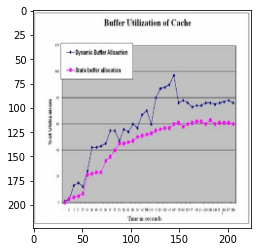

Figure #5
Figure ID: 1002.1166v1-Figure4-1.png
Gold Caption: Figure 4 Buffer utilization
Model's Caption: Figure 4.Total videos processed



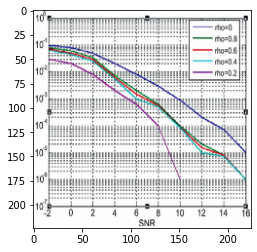

Figure #6
Figure ID: 1002.1198v1-Figure6-1.png
Gold Caption: Fig. 6 Performance of SNR vs BER for different values of ρ
Model's Caption: Fig. 3. ASEP versus SNR (dB): Multicore SM-LB



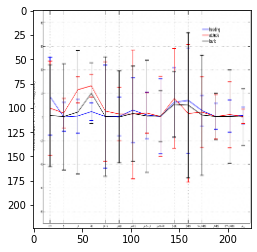

Figure #7
Figure ID: 1002.1288v1-Figure8-1.png
Gold Caption: Figure 8. Recognition accuracy in terms of mean orientation error (mm) in three directions: heading-x, attitute-y, bank-z for CT Abdominal male data with different number and combination of organs included in the model assembly.
Model's Caption: Figure 8: The impact of the number of points on the accuracy on the classification performance of our



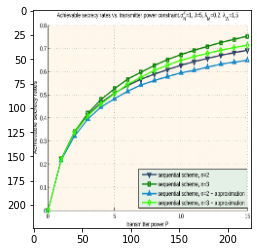

Figure #8
Figure ID: 1002.1313v1-Figure8-1.png
Gold Caption: Fig. 8. Achievable secrecy rates with our BMW secrecy encoding scheme, with uniform and with optimized partition of the interval[0, 1]. Exponentially distributed channel coefficients withλM = 0.2, λW = 1.5, J = 5, σ2N = 1.
Model's Caption: Fig. 8. The performance comparison of the BMW Symmetric secrecy secrecy rate for N



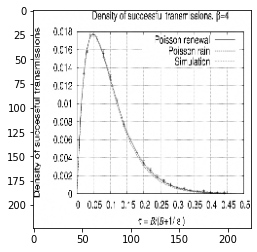

Figure #9
Figure ID: 1002.1629v1-Figure3-1.png
Gold Caption: Fig. 3. Density of successful transmissions versusτ = B B+1/ǫ. Comparison of the Poisson-renewal and the Poisson rain model to simulation results.
Model's Caption: Figure 3. A four-node in-network twouser with coverage area = 1000 m



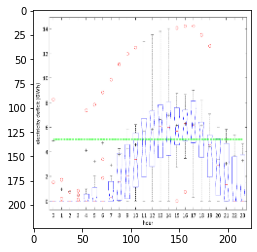

Figure #10
Figure ID: 1002.2243v1-Figure9-1.png
Gold Caption: Fig. 9: Boxplot of the energy deficits from Fig. 8 vs. hour of day. The deficit variability reflects the unpredictability of wind power—even in the early morning hours when demand is lowest, significant deficits can result from intermittency.
Model's Caption: Fig. 9. Hourly excess renewable energy demand, with estimated uncertainty for various wind rates with



<Figure size 432x288 with 0 Axes>

In [134]:
torch.manual_seed(42)
decoded, labels = model.run_sampling_batch(*model.process_batch(batch))
assert len(decoded) == len(labels) == 10

import matplotlib.pyplot as plt

for fig_index in range(len(decoded)):
    plt.imshow(batch["figure"][fig_index].permute(
        1, 2, 0).to(torch.uint8) / 255)
    plt.show()
    plt.figure()
    print(f'Figure #{fig_index + 1}')
    print(f"Figure ID: {batch['id'][fig_index]}")
    print(f'Gold Caption: {labels[fig_index]}')
    print(f"Model's Caption: {decoded[fig_index]}\n")

In [ ]:
# for key in ["references", "labels", "title", "id", "abstract"]:
#     print(key, batch[key][0])
# import matplotlib.pyplot as plt
# for fig_index in range(10):
#     plt.imshow(batch["figure"][fig_index].permute(1, 2, 0).to(torch.uint8) / 255)
#     plt.show()
#     print(batch['labels'][fig_index])
#     plt.figure()

